# Evaluation

**Requirements:**

- Runs on local machine
- short response time
- not too long training time

## Model Size

| Model    |      Size      |
|----------|:-------------:|
| Markov Chain |  0.73 MB | 
| Embedding Model |  0.93 MB|  
| GPT | 474 MB |
| LSTM Model | 2.7 MB |

## Training runtime

In [ ]:
from autocompletion import Autocompletion as MarkovAutocompletion
from embedding_autocompletion import Autocompletion as EmbeddingAutocompletion
from lstm_autocompletion import Autocompletion as LSTMAutocompletion
from gpt_autocompletion import Autocompletion as GPTAutocompletion

import time
import numpy as np
import matplotlib.pyplot as plt
import regex as re

In [ ]:
models = [("Markov Chain", MarkovAutocompletion("datasets/koalitionsvertrag.txt")),
          ("Embedding Model", EmbeddingAutocompletion("datasets/koalitionsvertrag.txt", model_path="evaluation.pt")),
          ("LSTM", LSTMAutocompletion("datasets/koalitionsvertrag.txt", model_path="evaluation/model"))]

times = []
for m in models:
    start = time.time()
    m[1].train_model()
    end = time.time()
    times.append((m[0], end - start))

[0.013999223709106445, 72.71526384353638, 291.9782543182373]


Text(0, 0.5, 'time in seconds')

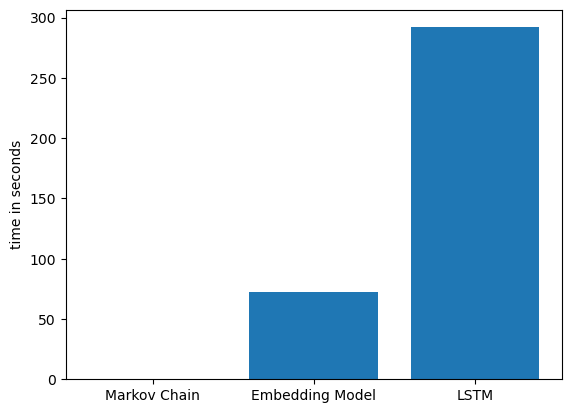

In [5]:
x = []
y = []
for t in times:
    x.append(t[0])
    y.append(t[1])

print(y)
plt.bar(x, y)
plt.ylabel("time in seconds")

## Response time

Model loaded ...
Model loaded ...
['werden.', 'werden', 'und', 'entsprechend', '.']
['wollen', 'ch.', '.', ',']
['zu', 'einem', 'Sorge', 'Schutzstrategie', 'Regelungsrecht']
['werden.', 'stufen', 'ist', '.', ',']
['ziger', 'der', 'chonzeichen', '.']
['die', 'Zusammenarbeit', 'Musterbevollzug', 'Klimakrise', 'Energiekommens']


Text(0, 0.5, 'time in seconds')

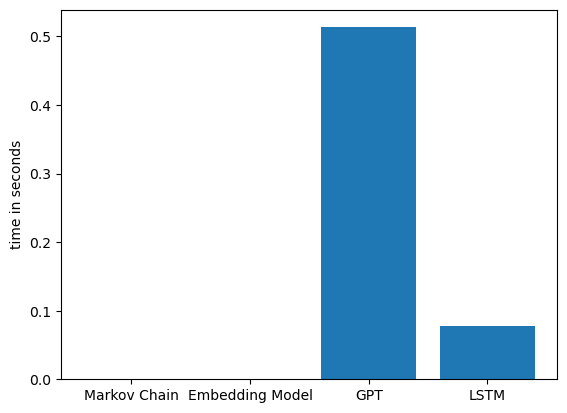

In [10]:
models = [("Markov Chain", MarkovAutocompletion("datasets/koalitionsvertrag.txt")),
          ("Embedding Model", EmbeddingAutocompletion("datasets/koalitionsvertrag.txt")),
          ("GPT", GPTAutocompletion("datasets/koalitionsvertrag.txt")),
          ("LSTM", LSTMAutocompletion("datasets/koalitionsvertrag.txt"))]

test_words = ["verantwortung", "zu", "das", "land", "in", "einer"]

times = []
for m in models:
    m[1].train_model()
    t = []
    for w in test_words:
        start = time.time()
        m[1].make_suggestions(w)
        end = time.time()
        t.append(end - start)
    times.append(np.sum(t)/len(test_words))

plt.bar(x, times)
plt.ylabel("time in seconds")

## Accuracy

**test-dataset**: Koalitionsvertrag Bayern 2023

In [ ]:
def preprocess_data(data, backspace_replace=" "):
    t = data.replace("\n", backspace_replace)
    replaced = re.sub('[^[a-zA-Z ßäüöÜÖÄ]]*', '', t)
    replaced = replaced.lower()
    replaced = re.sub(' +', ' ', replaced)
    return replaced

models = [("Markov Chain", MarkovAutocompletion("datasets/koalitionsvertrag.txt")),
          ("Embedding Model", EmbeddingAutocompletion("datasets/koalitionsvertrag.txt")),
          ("GPT", GPTAutocompletion("datasets/koalitionsvertrag.txt")),
          ("LSTM", LSTMAutocompletion("datasets/koalitionsvertrag.txt"))]

f = open("datasets/Koalitionsvertrag_2023_Freiheit_und_Stabilitaet.txt", "r")
data = preprocess_data(f.read()).strip().split()[0:1000]

metrics = []
for m in models:
    m[1].train_model()
    top1_predictions = 0
    top3_predictions = 0
    top5_predictions = 0
    prediction_amount = 0
    for i in range(100, len(data)):
        input = ' '.join(data[i-10:i]) + " "
        try:
            suggestions = m[1].make_suggestions(input)

            if data[i] in suggestions[0:1]: top1_predictions += 1
            if data[i] in suggestions[0:3]: top3_predictions += 1
            if data[i] in suggestions[0:5]: top5_predictions += 1
            prediction_amount += 1
        except:
            pass

    metrics.append([top1_predictions / prediction_amount, top3_predictions / prediction_amount, top5_predictions / prediction_amount])
    

In [ ]:
import pandas as pd
df = pd.DataFrame(metrics, columns = ['top1 suggestion', 'top3 suggestion', 'top5 suggestion'], index=['Markov Chain', 'Embedding Model', 'GPT', 'LSTM'])
df

,top1 suggestion,top3 suggestion,top5 suggestion
Markov Chain,0.063333,0.136667,0.171111
Embedding Model,0.004950,0.014851,0.019802
GPT,0.000000,0.000000,0.000000
LSTM,0.015573,0.040044,0.057842


Overall, it is very difficult to evaluate an autocomplete, as it should not only be able to predict the correct word, but should also serve as a source of ideas. Even if the Markov chain provides better accuracy results, the LSTM model is still much better at forming grammatically correct sentences and therefore acts as a better writing support. It can also be seen that the GPT does not achieve good accurracy. This can be attributed to an insufficient training data set, which makes the model unsuitable for the application.

## Conclusion

Overall, it can be said that the Markov model works best for the use case when it comes to pure auto-completion. When it comes to grammatical relationships, the LSTM model is best.